## Project: Writing a Data Scientist Blog Post
### Author: Nguyen Xuan Thang

## <a id='intro'></a>
## Introduction

In this project I implement the analysis on Seattle Airbnb Data (https://www.kaggle.com/datasets/airbnb/boston) including some steps:
- Business Understanding
- Data Wrangling
- Exploratory Data Analyis
- Conclusions

## Business Understanding
Millions of people today utilize Airbnb, a community-based online marketplace for selling and renting out local properties. While it doesn't really own any rooms, it links hosts and guests and streamlines the rental process. The primary source of Airbnb's income is the commission charged on each reservation. For Airbnb, it is crucial to figure out how to enhance both transaction volume and client retention.

This study involves examining a dataset that includes listings, a calendar, and reviews with the goal of gaining insightful knowledge and predicting the booking cost for a new property given a date and other factors. In order to elucidate the issues, the following questions need to be looked into:
- What neighborhood in Seattle has the best price?
- The cost per night comparison for the various types of properties?
- The pricing range/distribution for reservations?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## EDA Seattle Airbnb dataset

In [7]:
# read data listings
df_listings = pd.read_csv('./data/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
# read data calendar
df_calendar = pd.read_csv('./data/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
# read data review
df_reviews = pd.read_csv('./data/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Data Wrangling

In [11]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [12]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [13]:
#check null value
df_listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [14]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [15]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

## <a id='eda'></a>
## Exploratory Data Analysis

## 1. What neighborhood in Seattle has the best price?

In [64]:
def change_datatype(df, col_name, d_type):
    """
        Change the datatype of columns
        Param: dataframe, column name, datatype
        Return: datafram
    """    
    df[col_name]  = df[col_name].astype(d_type)
    return df 

In [65]:
def replace_character(df, col_name, from_sp_char, 
                              to_char, to_dtype):  
    """
        Replace the character from column
        Param: dataframe, column name, char, to_char, data type
        Return: dataframe
    """                          
    df[col_name] = df[col_name].replace(from_sp_char, to_char, regex=True).astype(to_dtype)
    return df 

In [25]:
# Convert Price to numeric
listings = replace_character(df_listings, 'price', '[\$,]', '', 'float')
listings = change_datatype(listings, 'price', 'int')

Text(0, 0.5, 'Price')

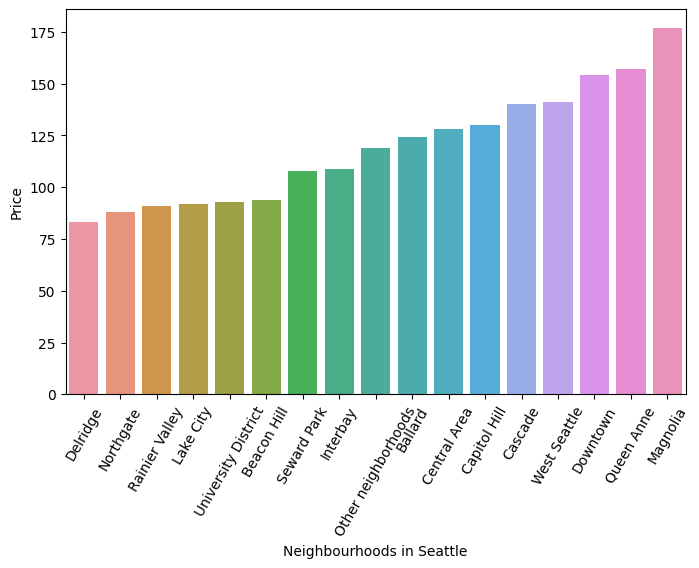

In [26]:
# Plot mean price per neighbourhood group

x = pd.DataFrame(listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=True))
x = x.reset_index()
x['price'] = x['price'].astype('int')

plt.rcParams["figure.figsize"] = (8,5)

sns.barplot(x = 'neighbourhood_group_cleansed',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Neighbourhoods in Seattle')
plt.ylabel('Price')

## Observations
- Queen Anne and Downtown are closely following with a typical price that is little over $150.
- Magnolia is the most costly lodging option, with a mean nightly rate that exceeds 175 dollars.
- Northgate and Rainier Valley are also affordable.
- With a mean price of little over $75 dollars, Delridge appears to be fairly affordable for renting Airbnb rooms/apartments.

Text(0, 0.5, 'Price')

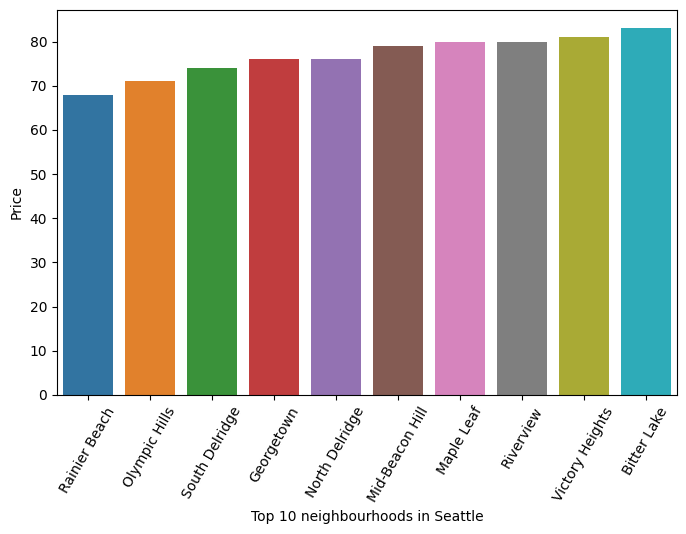

In [34]:
# Plot the top 10 most expensive neighbourhoods

x = pd.DataFrame(listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True).head(10))
x = x.reset_index()
x['price'] = x['price'].astype('int')

plt.rcParams["figure.figsize"] = (8,5)

sns.barplot(x = 'neighbourhood_cleansed',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Top 10 neighbourhoods in Seattle')
plt.ylabel('Price')

### Observations
- According to the analysis and the graph above, Rainier Beach is the least expensive neighborhood in Seattle, and Bitter Lake is the most expensive.

## 2. The cost per night comparison for the various types of properties?

Text(0, 0.5, 'Price')

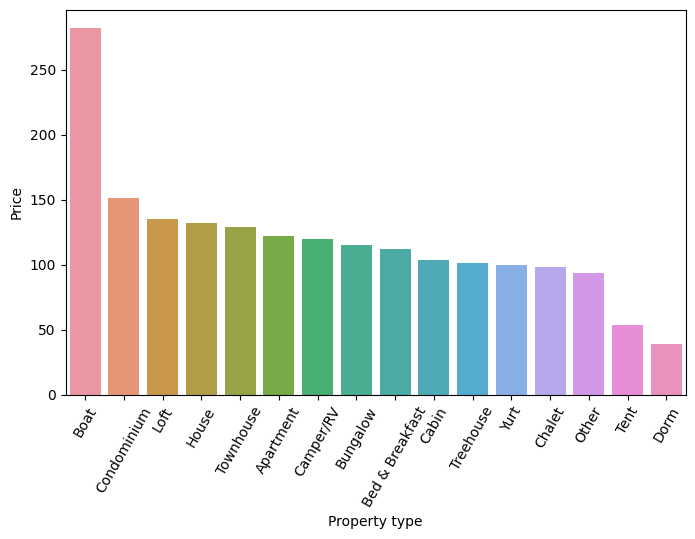

In [36]:
# PLot mean price per Property type
x = pd.DataFrame(listings.groupby('property_type')['price'].mean().sort_values(ascending=False))
x = x.reset_index()
x['price'] = x['price'].astype('int')

plt.rcParams["figure.figsize"] = (8,5)

sns.barplot(x = 'property_type',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Property type')
plt.ylabel('Price')

### Observations
- According to the bar graph above, the Boat property category has the highest cost, while the Dorm has the lowest.

## Tranform calendar 

In [40]:
# Extract month from date
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month 
# Extract weekday name from date
df_calendar['day'] = pd.to_datetime(df_calendar['date']).dt.day_name() 
df_calendar.head()

,listing_id,date,available,price,month,day,season
0,241032,2016-01-04,t,$85.00,1,Monday,winter
1,241032,2016-01-05,t,$85.00,1,Tuesday,winter
2,241032,2016-01-06,f,NaN,1,Wednesday,winter
3,241032,2016-01-07,f,NaN,1,Thursday,winter
4,241032,2016-01-08,f,NaN,1,Friday,winter


In [41]:
# Map each month to the corresponding season
map_season = {12: 'winter', 1:'winter', 2:'winter',
              3:'spring', 4:'spring', 5:'spring',            
              6:'summer', 7:'summer', 8:'summer',
              9: 'autumn', 10: 'autumn', 11: 'autumn'
             }
df_calendar['season'] = df_calendar['month'].map(map_season) 
df_calendar.head()

,listing_id,date,available,price,month,day,season
0,241032,2016-01-04,t,$85.00,1,Monday,winter
1,241032,2016-01-05,t,$85.00,1,Tuesday,winter
2,241032,2016-01-06,f,NaN,1,Wednesday,winter
3,241032,2016-01-07,f,NaN,1,Thursday,winter
4,241032,2016-01-08,f,NaN,1,Friday,winter


In [42]:
# Map each month number to the corresponding name
map_month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',          
            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df_calendar['month'] = df_calendar['month'].map(map_month)
df_calendar 

,listing_id,date,available,price,month,day,season
0,241032,2016-01-04,t,$85.00,Jan,Monday,winter
1,241032,2016-01-05,t,$85.00,Jan,Tuesday,winter
2,241032,2016-01-06,f,NaN,Jan,Wednesday,winter
3,241032,2016-01-07,f,NaN,Jan,Thursday,winter
4,241032,2016-01-08,f,NaN,Jan,Friday,winter
...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,Dec,Thursday,winter
1393566,10208623,2016-12-30,f,NaN,Dec,Friday,winter
1393567,10208623,2016-12-31,f,NaN,Dec,Saturday,winter
1393568,10208623,2017-01-01,f,NaN,Jan,Sunday,winter


In [44]:
df_calendar= df_calendar.rename(columns={'price': 'target'}) # Rename 'price' column to 'target'
df_calendar.head()

,listing_id,date,available,target,month,day,season
0,241032,2016-01-04,t,$85.00,Jan,Monday,winter
1,241032,2016-01-05,t,$85.00,Jan,Tuesday,winter
2,241032,2016-01-06,f,NaN,Jan,Wednesday,winter
3,241032,2016-01-07,f,NaN,Jan,Thursday,winter
4,241032,2016-01-08,f,NaN,Jan,Friday,winter


In [63]:
# Make a subset of all the dates when the properties are booked
calendar_booked = df_calendar[df_calendar['available']=='f']
set(calendar_booked['available']) 

set()

In [46]:
# Drop records which do not have any booking price
df_calendar = df_calendar[df_calendar['available']=='t']
set(df_calendar['available'])

{'t'}

In [48]:
# Convert Price to numeric
calendar = replace_character(df_calendar, 'target', '[\$,]', '', 'float')
calendar = change_datatype(df_calendar, 'target', 'int')
calendar.head()

,listing_id,date,available,target,month,day,season
0,241032,2016-01-04,t,85,Jan,Monday,winter
1,241032,2016-01-05,t,85,Jan,Tuesday,winter
9,241032,2016-01-13,t,85,Jan,Wednesday,winter
10,241032,2016-01-14,t,85,Jan,Thursday,winter
14,241032,2016-01-18,t,85,Jan,Monday,winter


## 3. The pricing range/distribution for reservations?

Text(0.5, 0, 'Booking Price')

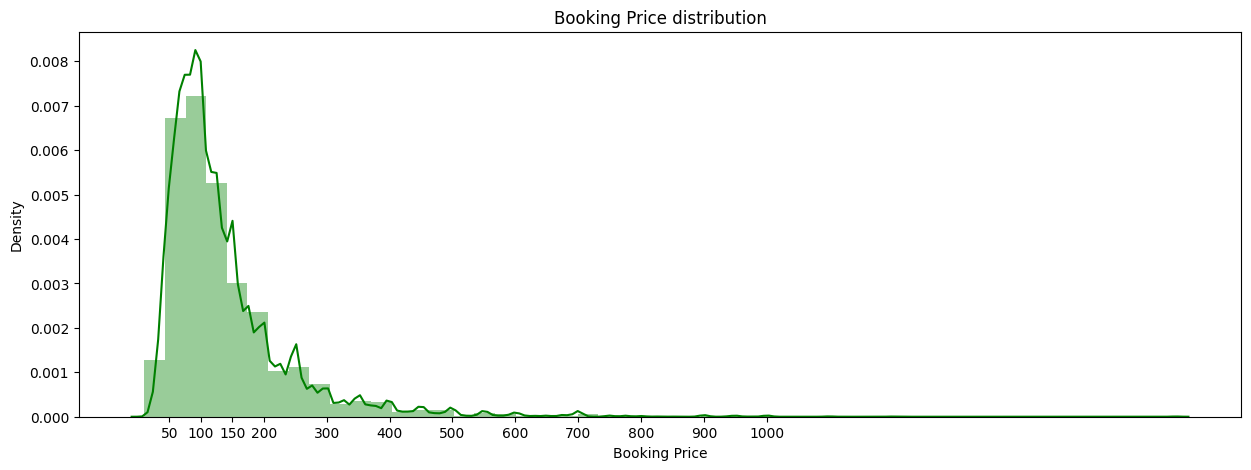

In [54]:
# Histogram of booking price distribution
plt.rcParams["figure.figsize"] = (15,5)
sns.distplot(calendar['target'], color='green')
x = [50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.xticks(x)
plt.title('Booking Price distribution')
plt.xlabel('Booking Price')

### Observations
- From this plot, we can see that the booking price is accurate; it is concentrated around $100 to $150, and the tail with a price beyond $300 is quite uncommon.

## <a id='conclusions'></a>
## Conclusions

### Based on the study presented here, the following insights and conclusions may be drawn:
- In Seattle, Downtown, Magnolia, and Queen Anne are the most costly areas for Airbnb.
- Delridge is the most affordable place to stay.
- A boat would be the most costly location to stay, while a dorm would be the least expensive.
- In the upcoming investigation, machine learning will be used to estimate the price based on other linked variables.